In [2]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import category_encoders as ce
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import os


#for substacting series without copies
pd.options.mode.chained_assignment = None 

import category_encoders as ce
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers

2023-05-20 10:52:51.059158: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# DATA INSPECTION

In [4]:
#read datafile and store it in a dataframe names df_2009
df_2009=pd.read_csv('data_new_1/2009.csv')

#we examine the dimensions of the dataframe (number rows/entries, number columns/features)
df_2009.shape

(6429338, 28)

In [5]:
#we  obtain information on the dataframes
#we examine the type of each  Feature

df_2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429338 entries, 0 to 6429337
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [6]:
#column  explanation

#FL_DATE
#Date of the flight, yy/mm/dd

#OP_CARRIER
#Airline Identifier

#OP_CARRIER_FL_NUM
#Flight Number


#ORIGIN
#Starting Airport Code

#DEST
#Destination Airport Code

#CRS_DEP_TIME
#Planned Departure Time

#DEP_TIME
#Actual Departure Time
#WHEELS_OFF - TAXI_OUT

#DEP_DELAY
#Total Delay on Departure in minutes

#TAXI_OUT
#The time duration elapsed between departure from the origin airport gate 
#and wheels off

#WHEELS_OFF
#The time point that the aircraft's wheels leave the ground

#WHEELS_ON
#The time point that the aircraft's wheels touch on the ground

#TAXI_IN
#The time duration elapsed between wheels-on and gate arrival at the destination airport

#CRS_ARR_TIME
#Planned arrival time

#ARR_TIME
#Actual Arrival Time
#WHEELS_ON+TAXI_IN

#ARR_DELAY
#Total Delay on Arrival in minutes
#ARRIVAL_TIME-SCHEDULED_ARRIVAL


#CANCELLED
#Flight Cancelled (1 = cancelled)


#CANCELLATION_CODE
#Reason for Cancellation of flight: 
#A - Airline/Carrier; B - Weather; C - National Air System; D - Security


#DIVERTED
#Aircraft landed on airport that out of schedule

#CRS_ELAPSED_TIME
#Planned time amount needed for the flight trip

#ACTUAL_ELAPSED_TIME
#AIR_TIME+TAXI_IN+TAXI_OUT

#AIR_TIME
#The time duration between wheels_off and wheels_on time

#DISTANCE
#Distance between two airports

#CARRIER_DELAY
#Delay caused by the airline in minutes

#WEATHER_DELAY
#Delay caused by weather

#NAS_DELAY
#Delay caused by air system

#SECURITY_DELAY

#LATE_AIRCRAFT_DELAY
#Delay caused by security

#Unnamed: 27
#Useless column



## COLUMN SELECTION 



In [7]:
#amm columns of the dataframe

df_2009.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')

In [8]:
#among all fetures/vriables 
#at a first step we consider variables:

#FL_DATE  
#OP_CARRIER
#OP_CARRIER_FL_NUM
#ORIGIN
#DEST
#DEP_TIME
#DEP_DELAY
#TAXI_OUT 
#TAXI_IN 
#ARR_DELAY
#CANCELLED
#DIVERTED
#CRS_ELAPSED_TIME 
#ACTUAL_ELAPSED_TIME
#AIR_TIME
#DISTANCE

#df_2009_a= the dataframe containing only the considered features/variables
df_2009_a=df_2009[["FL_DATE","OP_CARRIER","OP_CARRIER_FL_NUM","ORIGIN",\
                  "DEST","DEP_TIME","DEP_DELAY","TAXI_OUT","TAXI_IN","ARR_DELAY",\
                  "CANCELLED","DIVERTED","CRS_ELAPSED_TIME","ACTUAL_ELAPSED_TIME",\
                  "AIR_TIME","DISTANCE"]].copy()

In [9]:
#examination of the first rows of dataframe df_2009_a containing only the  selected features
df_2009_a.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2009-01-01,XE,1204,DCA,EWR,1058.0,-2.0,18.0,8.0,4.0,0.0,0.0,62.0,68.0,42.0,199.0
1,2009-01-01,XE,1206,EWR,IAD,1509.0,-1.0,28.0,4.0,-8.0,0.0,0.0,82.0,75.0,43.0,213.0
2,2009-01-01,XE,1207,EWR,DCA,1059.0,-1.0,20.0,6.0,-9.0,0.0,0.0,70.0,62.0,36.0,199.0
3,2009-01-01,XE,1208,DCA,EWR,1249.0,9.0,10.0,9.0,-12.0,0.0,0.0,77.0,56.0,37.0,199.0
4,2009-01-01,XE,1209,IAD,EWR,1705.0,-10.0,24.0,13.0,-38.0,0.0,0.0,105.0,77.0,40.0,213.0


In [10]:
#information on dataframe df_2009_a containing only the  selected features
df_2009_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429338 entries, 0 to 6429337
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   DEP_TIME             float64
 6   DEP_DELAY            float64
 7   TAXI_OUT             float64
 8   TAXI_IN              float64
 9   ARR_DELAY            float64
 10  CANCELLED            float64
 11  DIVERTED             float64
 12  CRS_ELAPSED_TIME     float64
 13  ACTUAL_ELAPSED_TIME  float64
 14  AIR_TIME             float64
 15  DISTANCE             float64
dtypes: float64(11), int64(1), object(4)
memory usage: 784.8+ MB


In [11]:
#we examine the number of missing values per Feature for dataframe df_2009_a
df_2009_a.isnull().sum()

FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
DEP_TIME                82867
DEP_DELAY               82867
TAXI_OUT                85787
TAXI_IN                 89321
ARR_DELAY              102361
CANCELLED                   0
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME    102362
AIR_TIME               102361
DISTANCE                    0
dtype: int64

In [12]:
#we examine the percentage of missing values for the entire dataframe df_2009_a

df_2009_a.isnull().sum().sum()*100/df_2009_a.shape[0]

10.077647185448953

In [13]:
#the dimensions of dataframe df_2009_a, 
#that is a pair (number rows/entries, number columns/features/variables)
df_2009_a.shape

(6429338, 16)

In [14]:
#examination of the different flight operators, these are the aviation companies
#included in the dataset df_2009_a
df_2009_a["OP_CARRIER"].unique()

array(['XE', 'YV', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'EV', 'F9', 'FL',
       'HA', 'MQ', '9E', 'AA', 'AS', 'B6', 'CO', 'DL'], dtype=object)

In [15]:
#we mesure the observations per flight operator
#that is variable "OP_CARRIER"

df_2009_a["OP_CARRIER"].value_counts()

WN    1128947
AA     550056
OO     546195
MQ     435670
DL     426036
US     412008
UA     376272
XE     309360
EV     298696
NW     292400
9E     262269
CO     256446
FL     249954
YV     243060
B6     194109
OH     150970
AS     137140
F9      87002
HA      72748
Name: OP_CARRIER, dtype: int64

In [16]:
#DUE TO INCREASED DATASIZE
#WE DECIDE TO KEEP ONE OPERATOR UA 
#HOWEVER A SIMILAR STUDY CAN BE APPLIED FOR THE REMAINING OPERATORS

#values=["WN","UA","AA","DL"]
#values=["WN","UA","DL"]

#we create a dataframe named df_2009_b containing  obervations 
#involving only the desires values for the variable "OP_CARRIER"
#in our case the flight operator "UA" (United Airlines)
values=["UA"]
df_2009_b=df_2009_a[df_2009_a["OP_CARRIER"].isin(values)]

In [17]:
#obtain information the dataframe df_2009_b containing  obervations
#only for flight operator "UA"
df_2009_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376272 entries, 3102 to 6421233
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              376272 non-null  object 
 1   OP_CARRIER           376272 non-null  object 
 2   OP_CARRIER_FL_NUM    376272 non-null  int64  
 3   ORIGIN               376272 non-null  object 
 4   DEST                 376272 non-null  object 
 5   DEP_TIME             370306 non-null  float64
 6   DEP_DELAY            370306 non-null  float64
 7   TAXI_OUT             370095 non-null  float64
 8   TAXI_IN              369971 non-null  float64
 9   ARR_DELAY            369288 non-null  float64
 10  CANCELLED            376272 non-null  float64
 11  DIVERTED             376272 non-null  float64
 12  CRS_ELAPSED_TIME     376272 non-null  float64
 13  ACTUAL_ELAPSED_TIME  369288 non-null  float64
 14  AIR_TIME             369288 non-null  float64
 15  DISTANCE     

### DATA PREPARATION

### MISSING VALUES

In [18]:
#countining the total number of missing values in dataframe df_2009_b
df_2009_b.isnull().sum().sum()

45362

In [19]:
#countinng the number of missingvalues per feature in dataframe df_2009_b

df_2009_b.isnull().sum()

FL_DATE                   0
OP_CARRIER                0
OP_CARRIER_FL_NUM         0
ORIGIN                    0
DEST                      0
DEP_TIME               5966
DEP_DELAY              5966
TAXI_OUT               6177
TAXI_IN                6301
ARR_DELAY              6984
CANCELLED                 0
DIVERTED                  0
CRS_ELAPSED_TIME          0
ACTUAL_ELAPSED_TIME    6984
AIR_TIME               6984
DISTANCE                  0
dtype: int64

In [20]:
#SINCE CANCELLED FLIGHTS WILL BE DELAYED ANYHOW REGARDING THE ORIGINALLY 
#PLANNED DATE WE REMOVE THESE FLIGHTS

In [21]:
#df_2009_c : the dataframe involving UA as single fligh operator containing
#only non cancelled flights
df_2009_c = df_2009_b.drop(df_2009_b[(df_2009_b.CANCELLED == 1)].index)

In [22]:
#we verify that the unique value  for variable "CANCELLED" is zero
#that is all remaining flights in dataframe df_2009_c are not cancelled.
df_2009_c["CANCELLED"].unique()

array([0.])

In [23]:
#SINCE THE REMAINING FLIGHTS ARE NOT CANCELED WE REMOVE  VARIABLE 'CANCELLED' TOO

In [24]:
#df_2009_d is the dataframe without variable 'CANCELLED
#as all considered flights are not cancelled

df_2009_d = df_2009_c.drop('CANCELLED', axis=1)


In [25]:
#we examine the missing values of the dataframe df_2009_d

df_2009_d.isnull().sum() 

FL_DATE                  0
OP_CARRIER               0
OP_CARRIER_FL_NUM        0
ORIGIN                   0
DEST                     0
DEP_TIME                 0
DEP_DELAY                0
TAXI_OUT                 0
TAXI_IN                 88
ARR_DELAY              771
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    771
AIR_TIME               771
DISTANCE                 0
dtype: int64

In [26]:
#we examine how many diverted flights are null (that is missing diverted flights)
df_2009_d[df_2009_d["DIVERTED"]==1].isnull().sum()

FL_DATE                  0
OP_CARRIER               0
OP_CARRIER_FL_NUM        0
ORIGIN                   0
DEST                     0
DEP_TIME                 0
DEP_DELAY                0
TAXI_OUT                 0
TAXI_IN                 88
ARR_DELAY              771
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    771
AIR_TIME               771
DISTANCE                 0
dtype: int64

In [27]:

#we have a look at flights which are diverted (variable "DIVERTED" takes value 1)
df_2009_d[df_2009_d["DIVERTED"]==1]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
3503,2009-01-01,UA,473,ORD,SNA,1957.0,-2.0,29.0,NaN,NaN,1.0,271.0,NaN,NaN,1726.0
3853,2009-01-01,UA,1164,SFO,SAN,2243.0,22.0,22.0,NaN,NaN,1.0,88.0,NaN,NaN,447.0
3901,2009-01-01,UA,1227,DEN,SAN,2136.0,12.0,10.0,NaN,NaN,1.0,145.0,NaN,NaN,853.0
41202,2009-01-03,UA,187,IAD,SFO,656.0,-4.0,15.0,5.0,NaN,1.0,366.0,NaN,NaN,2419.0
41453,2009-01-03,UA,478,SFO,DFW,1028.0,-4.0,15.0,10.0,NaN,1.0,207.0,NaN,NaN,1464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333185,2009-12-26,UA,443,DCA,DEN,848.0,24.0,15.0,11.0,NaN,1.0,251.0,NaN,NaN,1476.0
6333436,2009-12-26,UA,732,SEA,ORD,609.0,-6.0,26.0,9.0,NaN,1.0,237.0,NaN,NaN,1721.0
6371526,2009-12-28,UA,52,KOA,LAX,1509.0,51.0,12.0,10.0,NaN,1.0,327.0,NaN,NaN,2504.0
6407639,2009-12-30,UA,21,DEN,EGE,2059.0,-5.0,16.0,4.0,NaN,1.0,56.0,NaN,NaN,120.0


In [28]:
#We remove diverted flights as they will be delayed anyhow.
#Furthermore, for the diverted we do not have value for their arrival time 
#(variable "ARR_TIME") so we cannot
#compute arrival time and thus yhe related arrival delay
#unless we create a model to estimate these values.
#howeevr this  work is not done here, so diverted flights wil be removed from the dataset.

#df_2009_e is the ppart of dataframe df_2009_d for which all flights are not diverted
df_2009_e = df_2009_d.drop(df_2009_d[(df_2009_d.DIVERTED == 1)].index)




In [29]:
#we check the values taken for variable "DIVERTED" in dataframe df_2009_e
# now  variable "DIVERTED" should  value 0 for every entry of dataframe df_2009_e
df_2009_e["DIVERTED"].unique()

array([0.])

In [30]:
#since the remaining flights are not diverted we can  ignore  feature 'DIVERTED'
#df_2009_f is the  new resulting dataframe
df_2009_f = df_2009_e.drop('DIVERTED', axis=1)

In [31]:

#SO WE CONSIDER FLIGHTS THAT ARE NOT DIVERTED AND WE REMOVE ONE MORE VARIABLE (DIVERTED)
#FROM THE  CONSIDERED COLUMNS

#WE VERIFY THAT THE NEW DATAFRAME HAS NO  MISSING VALUES 


In [32]:
df_2009_f.isnull().sum()

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
TAXI_IN                0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

In [33]:
#w examine whether the flight number  that is variable 'OP_CARRIER_FL_NUM'
#corresponds to unique pairs (origin, destination)

df_2009_f[df_2009_f['OP_CARRIER_FL_NUM']==1227][:987]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
3900,2009-01-01,UA,1227,BWI,DEN,1901.0,35.0,25.0,6.0,42.0,244.0,251.0,220.0,1491.0
28498,2009-01-02,UA,1227,BWI,DEN,1823.0,-3.0,12.0,5.0,1.0,244.0,248.0,231.0,1491.0
28499,2009-01-02,UA,1227,DEN,SAN,2202.0,38.0,13.0,2.0,37.0,146.0,145.0,130.0,853.0
41905,2009-01-03,UA,1227,BWI,DEN,1855.0,29.0,10.0,5.0,16.0,244.0,231.0,216.0,1491.0
41906,2009-01-03,UA,1227,DEN,SAN,2259.0,95.0,8.0,2.0,81.0,146.0,132.0,122.0,853.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477989,2009-03-26,UA,1227,BWI,DEN,1809.0,-6.0,12.0,23.0,15.0,246.0,267.0,232.0,1491.0
1506882,2009-03-27,UA,1227,BWI,DEN,1813.0,-2.0,10.0,8.0,-20.0,246.0,228.0,210.0,1491.0
1506883,2009-03-27,UA,1227,DEN,SAN,2109.0,-3.0,10.0,1.0,-28.0,145.0,120.0,109.0,853.0
1514293,2009-03-28,UA,1227,BWI,DEN,1951.0,88.0,11.0,5.0,52.0,246.0,210.0,194.0,1491.0


In [34]:
# WE SEE THAT FLIGHT NUMBERS ARE NOT UNIQUE
#THERE ARE FLIGHTS WITH DIFFERENT ORIGINS-DESTINATIONS HAVING THE SAME FLIGHT NUMBER

#thus flight number 1227 is considered for a flight from DEN (Denver) to SAN (Santiago)
#but also from BWI (Baltimore-Washinghton) to DEN (Denver)

In [35]:
#DATAFRAME TO  CONSIDER named df_2009_1
#we create a copy of df_2009_f, named df_2009_1,
#so as  to have the reference dataframe intacted

df_2009_1=df_2009_f.copy()

In [36]:
#we examine the columns of dataframe df_2009_1
df_2009_1.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE'],
      dtype='object')

In [37]:
#we examine the information on df_2009_1, that is 
#the type and the number of non missing values per Feature
df_2009_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369288 entries, 3102 to 6421233
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              369288 non-null  object 
 1   OP_CARRIER           369288 non-null  object 
 2   OP_CARRIER_FL_NUM    369288 non-null  int64  
 3   ORIGIN               369288 non-null  object 
 4   DEST                 369288 non-null  object 
 5   DEP_TIME             369288 non-null  float64
 6   DEP_DELAY            369288 non-null  float64
 7   TAXI_OUT             369288 non-null  float64
 8   TAXI_IN              369288 non-null  float64
 9   ARR_DELAY            369288 non-null  float64
 10  CRS_ELAPSED_TIME     369288 non-null  float64
 11  ACTUAL_ELAPSED_TIME  369288 non-null  float64
 12  AIR_TIME             369288 non-null  float64
 13  DISTANCE             369288 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 42.3+ MB


In [38]:
#statistics on dataframe df_2009_1
#mean value, standard deviatian and quartiles per Feature
df_2009_1.describe()

,OP_CARRIER_FL_NUM,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
count,369288.000000,369288.000000,369288.000000,369288.000000,369288.000000,369288.000000,369288.000000,369288.000000,369288.000000,369288.000000
mean,506.519018,1318.802352,8.050573,16.807375,6.736444,1.034190,177.070311,170.053928,146.510109,1110.633617
std,313.279566,491.158564,34.344019,9.997548,4.463976,37.669808,88.446191,87.755855,86.081345,734.988017
min,1.000000,1.000000,-31.000000,2.000000,1.000000,-86.000000,35.000000,29.000000,16.000000,68.000000
25%,251.000000,858.000000,-5.000000,11.000000,4.000000,-17.000000,110.000000,104.000000,82.000000,590.000000
50%,484.000000,1307.000000,-2.000000,14.000000,6.000000,-8.000000,145.000000,139.000000,115.000000,853.000000
75%,739.000000,1731.000000,4.000000,19.000000,8.000000,5.000000,239.000000,231.000000,206.000000,1628.000000
max,1689.000000,2400.000000,1409.000000,290.000000,178.000000,1403.000000,552.000000,619.000000,569.000000,4244.000000


In [39]:
#we verify that in dataframe df_2009_1 there are no missing values per Feature
df_2009_1.isnull().sum()

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
TAXI_IN                0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

In [40]:
#we sort datframe f_2009_1 by FL_DATE  and DEP_TIME
df_2009_1=df_2009_1.sort_values(['FL_DATE', 'DEP_TIME'])
df_2009_1          

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
3392,2009-01-01,UA,363,IAD,ORD,3.0,128.0,14.0,4.0,110.0,124.0,106.0,88.0,589.0
3689,2009-01-01,UA,754,SEA,ORD,5.0,28.0,23.0,6.0,16.0,225.0,213.0,184.0,1721.0
3205,2009-01-01,UA,126,LAX,ORD,12.0,47.0,13.0,5.0,39.0,235.0,227.0,209.0,1745.0
3696,2009-01-01,UA,766,ORD,BWI,45.0,201.0,12.0,3.0,174.0,112.0,85.0,70.0,622.0
3648,2009-01-01,UA,696,SEA,DEN,535.0,-5.0,17.0,10.0,-20.0,158.0,143.0,116.0,1024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420463,2009-12-31,UA,38,OGG,SFO,2348.0,-2.0,9.0,5.0,-22.0,299.0,279.0,265.0,2338.0
6420585,2009-12-31,UA,158,SFO,ORD,2350.0,-9.0,15.0,6.0,-21.0,237.0,225.0,204.0,1846.0
6420509,2009-12-31,UA,78,HNL,SFO,2354.0,-1.0,17.0,4.0,-15.0,310.0,296.0,275.0,2399.0
6421063,2009-12-31,UA,754,SEA,ORD,2354.0,-5.0,13.0,5.0,-19.0,222.0,208.0,190.0,1721.0


In [41]:
#Two principal models are going to be considered 
#regarding the data as we will see next.
#One model examining Arrival Delays when the data will involve 
# only a single value for Origin (airort location).
#In this case we will have as many dataframes 
#as the unique values of variable "ORIGIN".
#That will be the model 1.
#Another model examining Arrival Delays when 
#considereing the entire set of data involving all 
#Origins. 
#This will be model 2.

#Both models will  estimate the Arrival Delays per 
#(Origin, Destination)  flight  for each
# Consdered time step.
#The difference is thatthe training, 
#validation and test sets will have either a single value per origin
#or all of them. 




In [42]:
#we save dataframe df_2009_1 in our current working environment
#as my_df_2009_1.pkl 
#if we need them we reload them back (df= pd.read_pickle("my_df_2009_1.pkl")

df_2009_1.to_pickle("my_df_2009_1.pkl")


##read DataFrame from pickle file
#df= pd.read_pickle("my_df_2009_1.pkl")

In [43]:
#we delete now the the variable DEP_TIME TO BE EXAMINED
#df_2009_1 = df_2009_1.drop('column_name', axis=1)

#df_2009_1=df_2009_1.drop("date",axis=1)


#WE DECIDED TO KEEP THE DEPARTURE TIME IN ITS FORMAT HOURTIME 

In [44]:
#WE AIM TO EXAMINE DELAYS REGARDING EACH ORIGIN SEPARETLY 
#AND COMPARE WITH THE RESULTS  OF THE MODEL CONSIDERING ALL THE
#ORIGINS




In [45]:
#RAW DATA VISUALISATION
#https://keras.io/examples/timeseries/timeseries_weather_forecasting/

In [46]:
df_2009_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369288 entries, 3392 to 6420560
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              369288 non-null  object 
 1   OP_CARRIER           369288 non-null  object 
 2   OP_CARRIER_FL_NUM    369288 non-null  int64  
 3   ORIGIN               369288 non-null  object 
 4   DEST                 369288 non-null  object 
 5   DEP_TIME             369288 non-null  float64
 6   DEP_DELAY            369288 non-null  float64
 7   TAXI_OUT             369288 non-null  float64
 8   TAXI_IN              369288 non-null  float64
 9   ARR_DELAY            369288 non-null  float64
 10  CRS_ELAPSED_TIME     369288 non-null  float64
 11  ACTUAL_ELAPSED_TIME  369288 non-null  float64
 12  AIR_TIME             369288 non-null  float64
 13  DISTANCE             369288 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 42.3+ MB


In [47]:
data_1=df_2009_1
names_num_features=data_1.select_dtypes(include=np.number).columns.tolist()
names_num_features

['OP_CARRIER_FL_NUM',
 'DEP_TIME',
 'DEP_DELAY',
 'TAXI_OUT',
 'TAXI_IN',
 'ARR_DELAY',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE']

In [48]:
data_num=data_1[names_num_features]

In [52]:
def show_raw_visualization(
    data,
    date_time_key,
    feature_keys,
    titles,
    colors):
    
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=5, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()

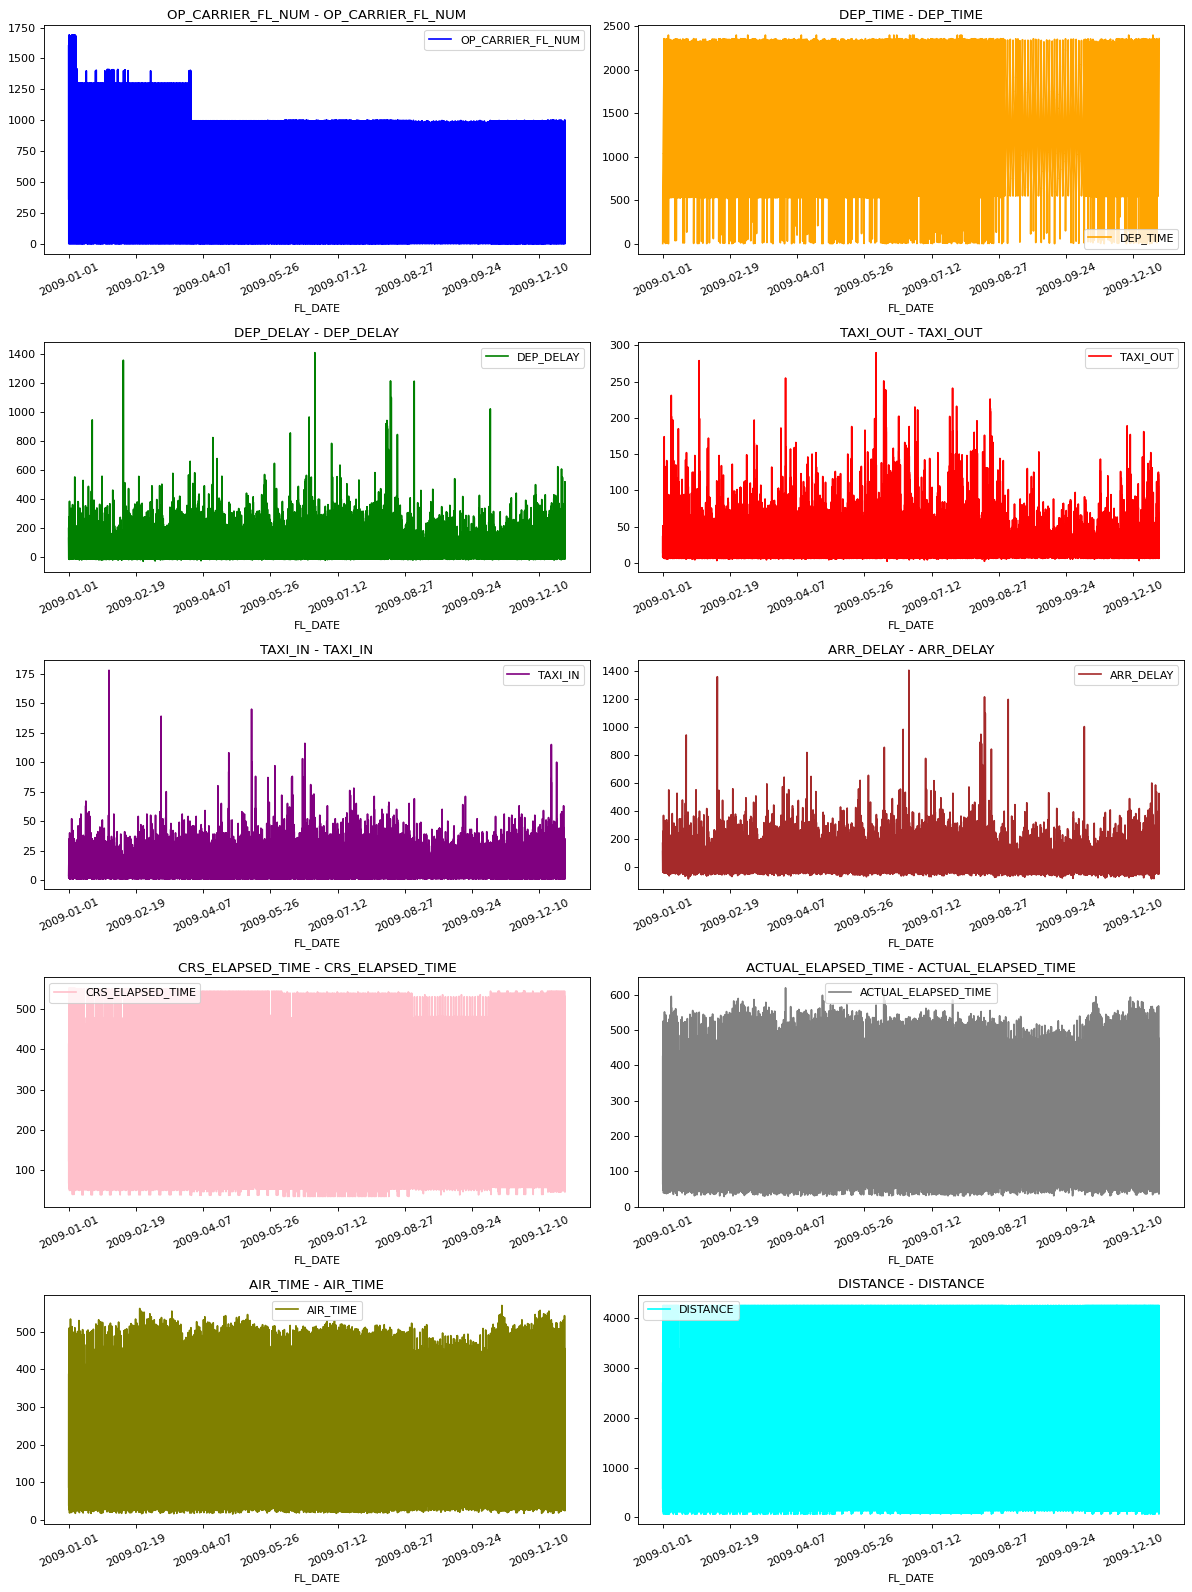

In [53]:
v_data=data_1
v_date_time_key="FL_DATE"
v_feature_keys=names_num_features
v_titles=names_num_features
v_colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

show_raw_visualization(
    data=v_data,
    date_time_key=v_date_time_key,
    feature_keys=v_feature_keys,
    titles=v_titles,
    colors=v_colors)


/var/folders/xc/g6ttklrs11z6jcldbcv6dv980000gn/T/ipykernel_71898/4013167328.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data.corr())


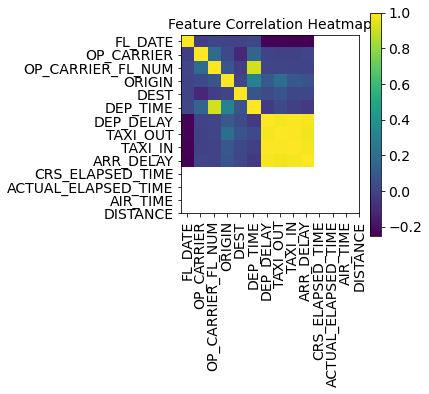

In [54]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(data=v_data)

/var/folders/xc/g6ttklrs11z6jcldbcv6dv980000gn/T/ipykernel_71898/3277273728.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(v_data.corr(), dtype=bool))
/var/folders/xc/g6ttklrs11z6jcldbcv6dv980000gn/T/ipykernel_71898/3277273728.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(v_data.corr(), vmin=-1, vmax=1, annot=True,annot_kws={'fontsize': 8},


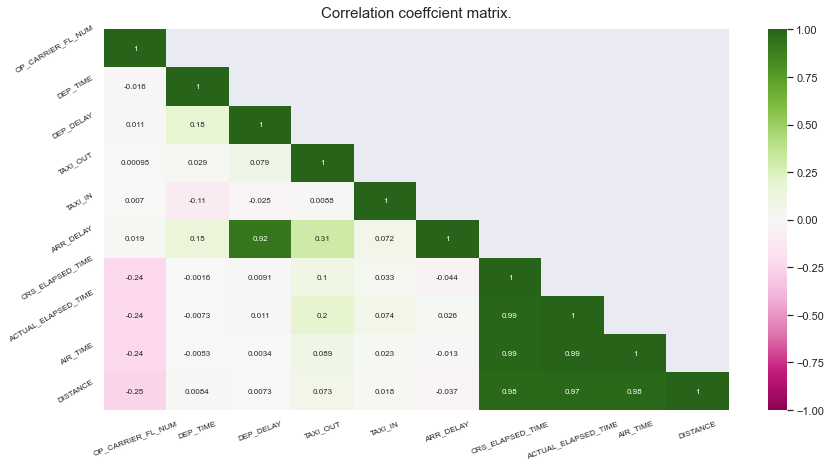

In [55]:
plt.figure(figsize=(14,7))
#plt.figure(figsize=(20,15))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,n=5, center="light", as_cmap=True)

#Create a mask
mask = np.triu(np.ones_like(v_data.corr(), dtype=bool))
np.fill_diagonal(mask, False)

#scale all fonts in your legend and on the axes.
#sns.set(font_scale=1.4)
sns.set(font_scale=1)

heatmap = sns.heatmap(v_data.corr(), vmin=-1, vmax=1, annot=True,annot_kws={'fontsize': 8},
cmap="PiYG", mask=mask)
heatmap.set_title('Correlation coeffcient matrix.', fontdict={'fontsize':15}, pad=12)
plt.yticks(rotation=30,fontsize=8)
plt.xticks(rotation=20,fontsize=8)
#plt.savefig("Figures/fig_cor_heatmap.png")
#plt.close(fig)
plt.show()

<Figure size 432x288 with 0 Axes>

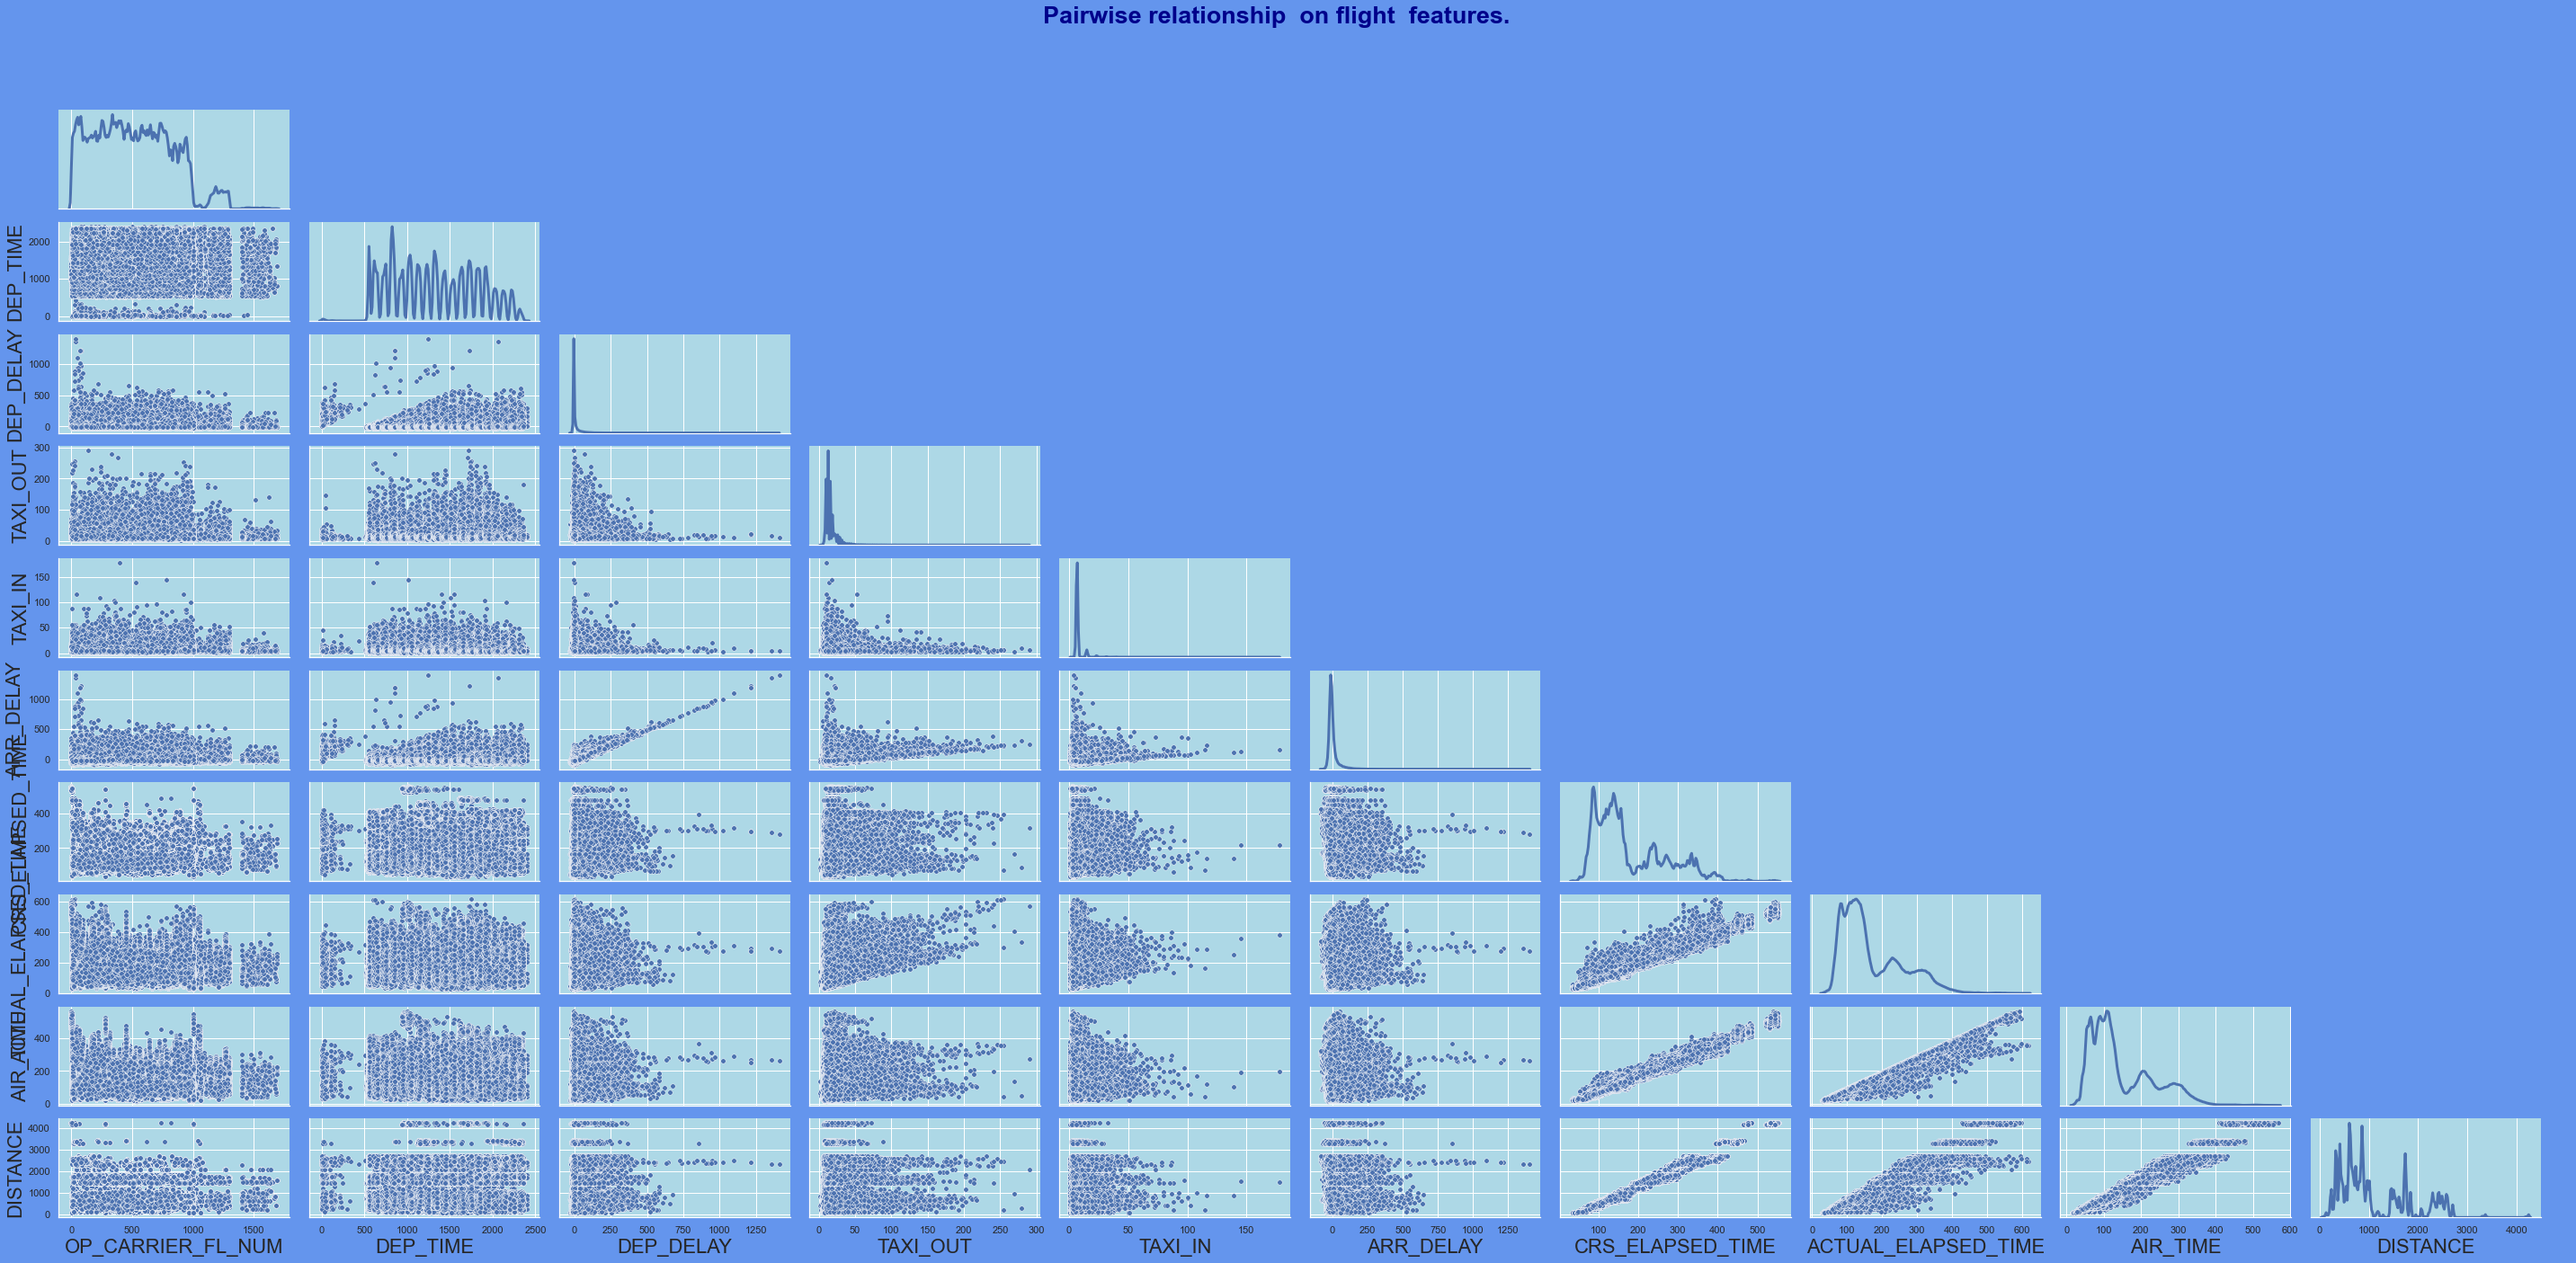

In [61]:
#*Pairgrid
sns.set(style="darkgrid")

res=sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'cornflowerblue'})

fig=plt.figure()
#fig=plt.figure(figsize=(22,167))
plt.rcParams["axes.labelsize"] = 22


#sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
#palette="viridis",palette="colorblind",palette="dark"
#sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'cornflowerblue'})
g = sns.PairGrid(v_data,diag_sharey=False,height=2, aspect=2,corner=True)
#g = sns.PairGrid(penguins_1, hue="sex",)
g.map_diag(sns.kdeplot,lw=3,bw_adjust=.25)
g.map_offdiag(sns.scatterplot,s=30)
g.add_legend()
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
#plt.xticks(rotation=70)

g.fig.suptitle('Pairwise relationship  on flight  features.',fontsize=27,weight="bold",c="darkblue")
#plt.savefig("Figures/fig_pairgrid_density_diagon_num_variables_coupons.png")
plt.show()